In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Model results with 100,000 samples for MLP and RandomForest

In [96]:
import pandas as pd
import glob

score_files = glob.glob('scores_10w_*.csv')
temp=[]
for f in score_files:
    temp_df = pd.read_csv(f, index_col=0)
    name = f.split('scores_10w_')[-1].split('.')[0]
    if name == 'glove_simplefeats':
        temp_df['accuracy'] = temp_df['accuracy']*100
        temp_df['f1 score'] = temp_df['f1 score']*100
    temp_df['feat']=name.rstrip('s')
    temp.append(temp_df)
    
all_scores0 = pd.concat(temp)

In [103]:
all_scores0.to_csv('all_scores_10w.csv')

In [100]:
by_model0 = all_scores0.sort_values(['model','accuracy'], ascending=False)
by_feat0 = all_scores0.sort_values(['feat','accuracy'], ascending=False)
by_model01 = by_model0[['model', 'accuracy', 'feat']]
by_model01 = by_model01.pivot_table(values='accuracy',index='model',columns='feat')
by_model02 = by_model0[['model', 'f1 score', 'feat']]
by_model02 = by_model02.pivot_table(values='f1 score',index='model',columns='feat')

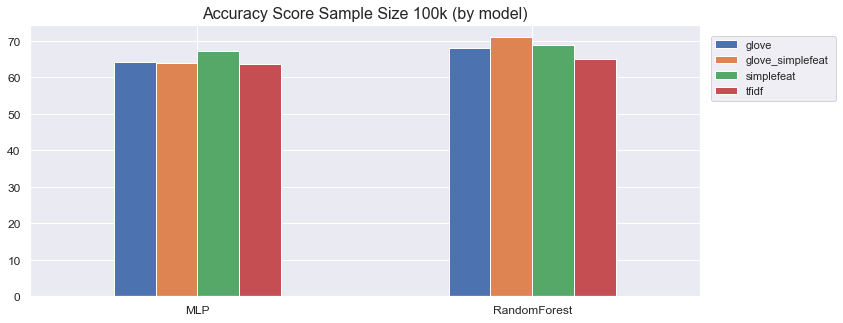

In [101]:
%matplotlib inline

ax = by_model01.plot(kind='bar', figsize=(12,5), fontsize=12);
ax.legend(bbox_to_anchor=(1, 0, 0.22, 1), loc=2, mode="expand", borderaxespad=1);
ax.set_title('Accuracy Score Sample Size 100k (by model)', fontsize=16);
ax.set_xlabel('')
plt.xticks(rotation=0);

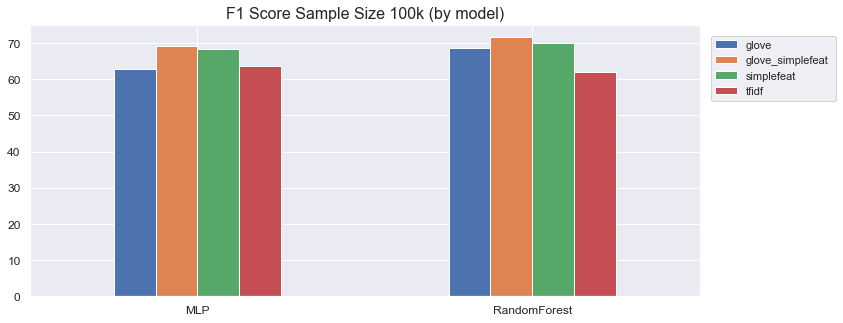

In [102]:
ax = by_model02.plot(kind='bar', figsize=(12,5), fontsize=12);
ax.legend(bbox_to_anchor=(1, 0, 0.22, 1), loc=2, mode="expand", borderaxespad=1);
ax.set_title('F1 Score Sample Size 100k (by model)', fontsize=16);
ax.set_xlabel('')
plt.xticks(rotation=0);

In [89]:
by_feat01 = by_feat0[['model', 'accuracy', 'feat']]
by_feat01 = by_feat01.pivot_table(values='accuracy',index='feat',columns='model')
by_feat02 = by_feat0[['model', 'f1 score', 'feat']]
by_feat02 = by_feat02.pivot_table(values='f1 score',index='feat',columns='model')

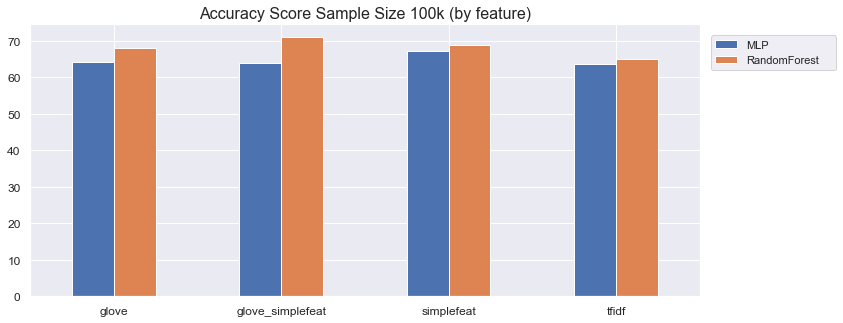

In [90]:
ax = by_feat01.plot(kind='bar', figsize=(12,5), fontsize=12);
ax.legend(bbox_to_anchor=(1, 0, 0.22, 1), loc=2, mode="expand", borderaxespad=1);
ax.set_title('Accuracy Score Sample Size 100k (by feature)', fontsize=16);
ax.set_xlabel('')
plt.xticks(rotation=0);

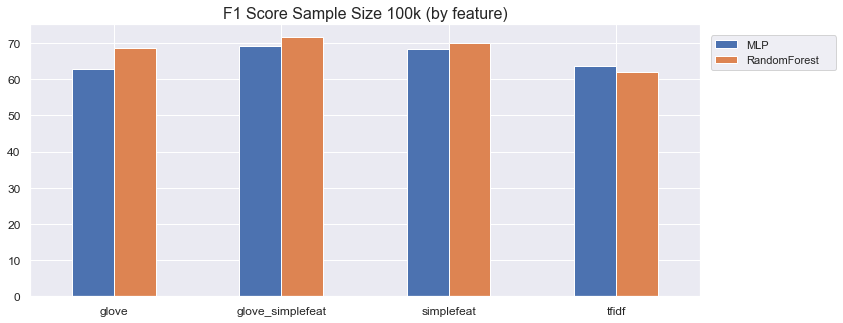

In [91]:
ax = by_feat02.plot(kind='bar', figsize=(12,5), fontsize=12);
ax.legend(bbox_to_anchor=(1, 0, 0.22, 1), loc=2, mode="expand", borderaxespad=1);
ax.set_title('F1 Score Sample Size 100k (by feature)', fontsize=16);
ax.set_xlabel('')
plt.xticks(rotation=0);

# Smaller 10,000 samples with SVM model results

In [104]:
# load all scores
glove_simplefeat = pd.read_csv('scores_1w_glove_simplefeats.csv', index_col=0)
glove_simplefeat['feat'] = 'glove_simplefeat'
glove = pd.read_csv('scores_1w_Glove.csv', index_col=0)
glove['feat'] = 'glove'
simplefeat = pd.read_csv('scores_1w_simplefeats.csv', index_col=0)
simplefeat['feat']='simplefeat'
tfidf = pd.read_csv('scores_1w_tfidf.csv', index_col=0)
tfidf['feat']='tfidf'

# concatenate
all_scores = pd.concat([glove_simplefeat,glove,simplefeat,tfidf])
all_scores = all_scores.reset_index()
all_scores = all_scores.rename(columns={'index':'model'})

In [108]:
all_scores.to_csv('all_scores_1w.csv')

In [105]:
by_model = all_scores.sort_values(['model','accuracy'], ascending=False)
by_feat = all_scores.sort_values(['feat','accuracy'], ascending=False)
by_model1 = by_model[['model', 'accuracy', 'feat']]
by_model1 = by_model1.pivot_table(values='accuracy',index='model',columns='feat')
by_model2 = by_model[['model', 'f1 score', 'feat']]
by_model2 = by_model2.pivot_table(values='f1 score',index='model',columns='feat')

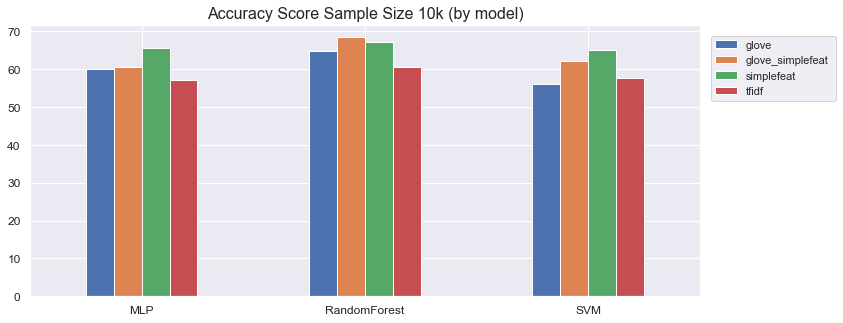

In [106]:
%matplotlib inline

ax = by_model1.plot(kind='bar', figsize=(12,5), fontsize=12);
ax.legend(bbox_to_anchor=(1, 0, 0.22, 1), loc=2, mode="expand", borderaxespad=1);
ax.set_title('Accuracy Score Sample Size 10k (by model)', fontsize=16);
ax.set_xlabel('')
plt.xticks(rotation=0);

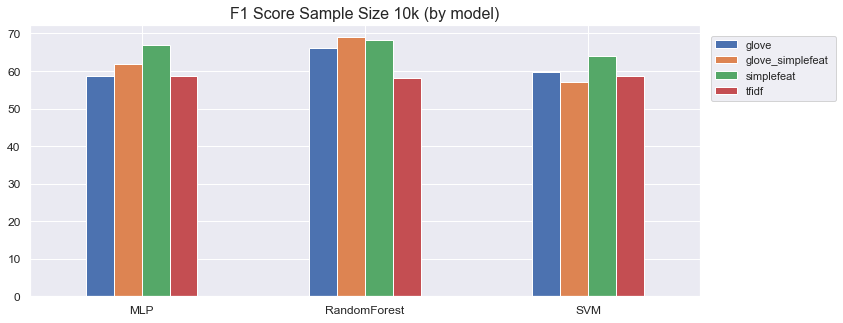

In [93]:
ax = by_model2.plot(kind='bar', figsize=(12,5), fontsize=12);
ax.legend(bbox_to_anchor=(1, 0, 0.22, 1), loc=2, mode="expand", borderaxespad=1);
ax.set_title('F1 Score Sample Size 10k (by model)', fontsize=16);
ax.set_xlabel('')
plt.xticks(rotation=0);

In [46]:
by_feat1 = by_feat[['model', 'accuracy', 'feat']]
by_feat1 = by_feat1.pivot_table(values='accuracy',index='feat',columns='model')
by_feat2 = by_feat[['model', 'f1 score', 'feat']]
by_feat2 = by_feat2.pivot_table(values='f1 score',index='feat',columns='model')

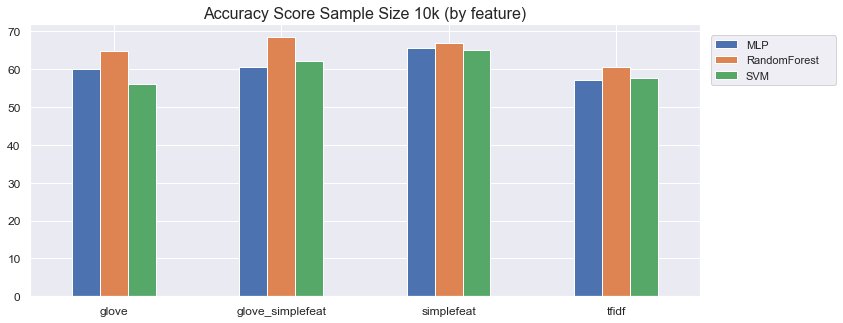

In [94]:
ax = by_feat1.plot(kind='bar', figsize=(12,5), fontsize=12);
ax.legend(bbox_to_anchor=(1, 0, 0.22, 1), loc=2, mode="expand", borderaxespad=1);
ax.set_title('Accuracy Score Sample Size 10k (by feature)', fontsize=16);
ax.set_xlabel('')
plt.xticks(rotation=0);

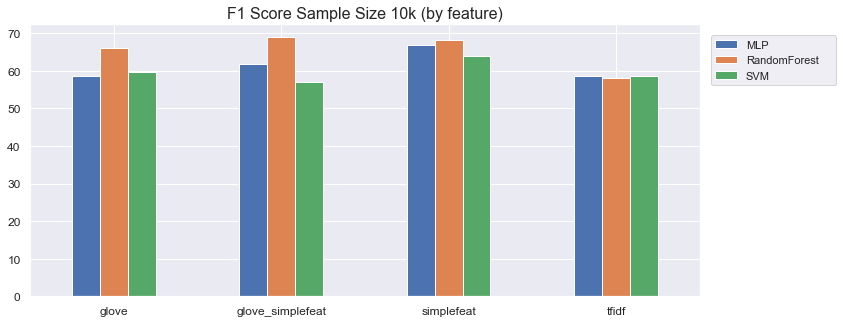

In [95]:
ax = by_feat2.plot(kind='bar', figsize=(12,5), fontsize=12);
ax.legend(bbox_to_anchor=(1, 0, 0.22, 1), loc=2, mode="expand", borderaxespad=1);
ax.set_title('F1 Score Sample Size 10k (by feature)', fontsize=16);
ax.set_xlabel('')
plt.xticks(rotation=0);

# ROC curve compile for RandomForest Model

In [111]:
roc_files = glob.glob('roc_*_100k.csv')
roc_files

['roc_tfidf_100k.csv',
 'roc_glove_100k.csv',
 'roc_glove_simple_100k.csv',
 'roc_simple_100k.csv']

In [114]:
pd.read_csv(roc_files[0], index_col=0)

,rf_fpr,rf_tpr,feat
0,0.000000,0.000000,tfidf
1,0.000000,0.004933,tfidf
2,0.000000,0.007499,tfidf
3,0.000000,0.008091,tfidf
4,0.000000,0.008189,tfidf
...,...,...,...
8527,0.988343,1.000000,tfidf
8528,0.992499,1.000000,tfidf
8529,0.994222,1.000000,tfidf
8530,0.996756,1.000000,tfidf


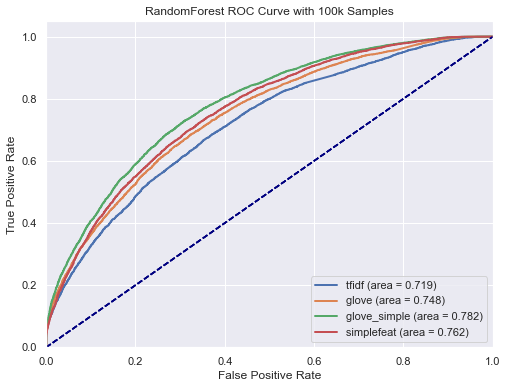

In [122]:
from sklearn.metrics import auc

plt.figure(figsize=(8,6))
lw = 2

for f in roc_files:
    temp = pd.read_csv(f, index_col=0)
    fpr = temp['rf_fpr'].tolist()
    tpr = temp['rf_tpr'].tolist()
    feat = temp['feat'].unique()[0]
    
    area = auc(fpr, tpr)
    area = round(area,3)
    plt.plot(fpr, tpr,
             lw=lw, label=f'{feat} (area = {area})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    
plt.title('RandomForest ROC Curve with 100k Samples');
plt.savefig('RandomForest ROC Curve with 100k Samples.jpg');